# Exploring Data with Python & GitHub
Let us have an interactive session as we go through a sample of the project, please feel free to ask any questions about the project as we wind down the Python sprint.
## Objectives
*    Have a walk-through of the basic structure of the Python project.
*    Identify some challenges faces during the project and how to overcome them.

## IMPORTS
Import all the required libraries for your analysis project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## LOAD DATA 

We will look at multiple options to import the data using pandas:
*    Local CSV
*    Github Raw file

### Local CSV
Pass the location of the file relative to your notebook

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
df

,date,open,high,low,close,volume
0,1/2/2014,25.07,25.8200,25.06,25.360,8998943
1,1/3/2014,25.75,26.7500,25.51,26.540,13836062
2,1/6/2014,26.62,27.2000,26.60,27.030,11272273
3,1/7/2014,27.20,27.3997,26.67,26.905,11288775
4,1/8/2014,26.37,27.6800,26.35,27.630,15736891
...,...,...,...,...,...,...
247,12/24/2014,50.66,51.6900,50.35,51.430,5961395
248,12/26/2014,51.46,52.2500,51.06,51.955,6841763
249,12/29/2014,51.65,53.2400,51.30,52.850,8791483
250,12/30/2014,53.00,53.7000,52.83,53.420,8063140


### Load directly from a GitHub raw CSV
Navigate to github and find the url for the raw file on your repository.
*    Allows you to capture the latest data without updating the entire repository.
*    You require an internet connection.

In [4]:
url = 'https://raw.githubusercontent.com/James-M-Beta/2501-PYTHON/refs/heads/main/data/data.csv'
df = pd.read_csv(url)

In [5]:
df

,date,open,high,low,close,volume
0,1/2/2014,25.07,25.8200,25.06,25.360,8998943
1,1/3/2014,25.75,26.7500,25.51,26.540,13836062
2,1/6/2014,26.62,27.2000,26.60,27.030,11272273
3,1/7/2014,27.20,27.3997,26.67,26.905,11288775
4,1/8/2014,26.37,27.6800,26.35,27.630,15736891
...,...,...,...,...,...,...
247,12/24/2014,50.66,51.6900,50.35,51.430,5961395
248,12/26/2014,51.46,52.2500,51.06,51.955,6841763
249,12/29/2014,51.65,53.2400,51.30,52.850,8791483
250,12/30/2014,53.00,53.7000,52.83,53.420,8063140


## Preview the data

In [6]:
df

,date,open,high,low,close,volume
0,1/2/2014,25.07,25.8200,25.06,25.360,8998943
1,1/3/2014,25.75,26.7500,25.51,26.540,13836062
2,1/6/2014,26.62,27.2000,26.60,27.030,11272273
3,1/7/2014,27.20,27.3997,26.67,26.905,11288775
4,1/8/2014,26.37,27.6800,26.35,27.630,15736891
...,...,...,...,...,...,...
247,12/24/2014,50.66,51.6900,50.35,51.430,5961395
248,12/26/2014,51.46,52.2500,51.06,51.955,6841763
249,12/29/2014,51.65,53.2400,51.30,52.850,8791483
250,12/30/2014,53.00,53.7000,52.83,53.420,8063140


In [7]:
df.tail(20)

,date,open,high,low,close,volume
232,12/3/2014,47.740,48.470,46.925,48.240,8917697
233,12/4/2014,49.600,50.270,49.320,49.650,15233774
234,12/5/2014,50.090,51.750,50.010,51.010,15588179
235,12/8/2014,50.440,51.320,50.150,50.820,16167321
236,12/9/2014,49.100,49.200,47.390,48.310,20575397
237,12/10/2014,49.800,50.399,48.250,48.940,18499976
238,12/11/2014,49.800,51.500,49.650,50.530,15100887
239,12/12/2014,51.675,51.700,49.900,49.970,15364034
240,12/15/2014,50.210,51.320,49.320,50.840,15368535
241,12/16/2014,51.010,51.150,47.680,47.960,22053666


## Basic information and cleaning

### Check all data types and non-null counts for each column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    252 non-null    object 
 1   open    252 non-null    float64
 2   high    252 non-null    float64
 3   low     252 non-null    float64
 4   close   252 non-null    float64
 5   volume  252 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 11.9+ KB


In [9]:
len(df)

252

In [10]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

### Display summary statistics for numeric columns

In [11]:
df.describe()

,open,high,low,close,volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,38.861944,39.549713,38.229872,38.923550,1.239803e+07
std,5.367492,5.389815,5.315830,5.336756,6.268067e+06
min,25.070000,25.820000,25.060000,25.360000,3.863064e+06
25%,35.855000,36.437500,35.020000,35.745000,8.480508e+06
50%,38.260000,38.860000,37.830000,38.235000,1.093462e+07
75%,42.500000,42.957500,41.656250,42.312500,1.411417e+07
max,53.900000,54.640000,53.320000,53.630000,4.147158e+07


### Convert *date* column to datetime if it isn't automatically picked up by pandas

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    252 non-null    datetime64[ns]
 1   open    252 non-null    float64       
 2   high    252 non-null    float64       
 3   low     252 non-null    float64       
 4   close   252 non-null    float64       
 5   volume  252 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.9 KB


In [14]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

### Sort the data chronologically

In [15]:
df = df.sort_values('date')

In [16]:
df

,date,open,high,low,close,volume
0,2014-01-02,25.07,25.8200,25.06,25.360,8998943
1,2014-01-03,25.75,26.7500,25.51,26.540,13836062
2,2014-01-06,26.62,27.2000,26.60,27.030,11272273
3,2014-01-07,27.20,27.3997,26.67,26.905,11288775
4,2014-01-08,26.37,27.6800,26.35,27.630,15736891
...,...,...,...,...,...,...
247,2014-12-24,50.66,51.6900,50.35,51.430,5961395
248,2014-12-26,51.46,52.2500,51.06,51.955,6841763
249,2014-12-29,51.65,53.2400,51.30,52.850,8791483
250,2014-12-30,53.00,53.7000,52.83,53.420,8063140


### Set the date as the index for further analysis

In [17]:
df.set_index('date', inplace=True)

In [18]:
df

,open,high,low,close,volume
date,,,,,
2014-01-02,25.07,25.8200,25.06,25.360,8998943
2014-01-03,25.75,26.7500,25.51,26.540,13836062
2014-01-06,26.62,27.2000,26.60,27.030,11272273
2014-01-07,27.20,27.3997,26.67,26.905,11288775
2014-01-08,26.37,27.6800,26.35,27.630,15736891
...,...,...,...,...,...
2014-12-24,50.66,51.6900,50.35,51.430,5961395
2014-12-26,51.46,52.2500,51.06,51.955,6841763
2014-12-29,51.65,53.2400,51.30,52.850,8791483


## Upload to Github

Lets push our changes to GitHub for another member of the team to proceed with the visualisation and analysis

## Visualisation and Analysis

### You can start your analysis with visuals of the columns you are interested in

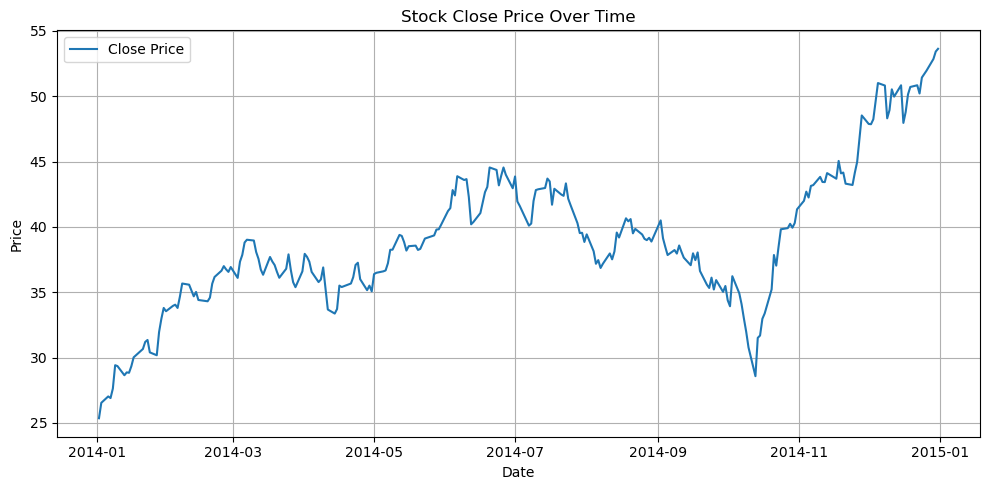

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(df['close'], label='Close Price')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Prices significantly changed over the year, it rose to more that double the original close price in 2014.

### Create a new column from existing data for analysis

Let us calculate the percentage change between each recorded period

In [20]:
df['return'] = df['close'].pct_change()

In [23]:
df.head(5)

,open,high,low,close,volume,return
date,,,,,,
2014-01-03,25.75,26.7500,25.51,26.540,13836062,0.046530
2014-01-06,26.62,27.2000,26.60,27.030,11272273,0.018463
2014-01-07,27.20,27.3997,26.67,26.905,11288775,-0.004624
2014-01-08,26.37,27.6800,26.35,27.630,15736891,0.026947
2014-01-09,28.24,29.6000,28.20,29.420,26056445,0.064785


In [22]:
df = df.dropna()

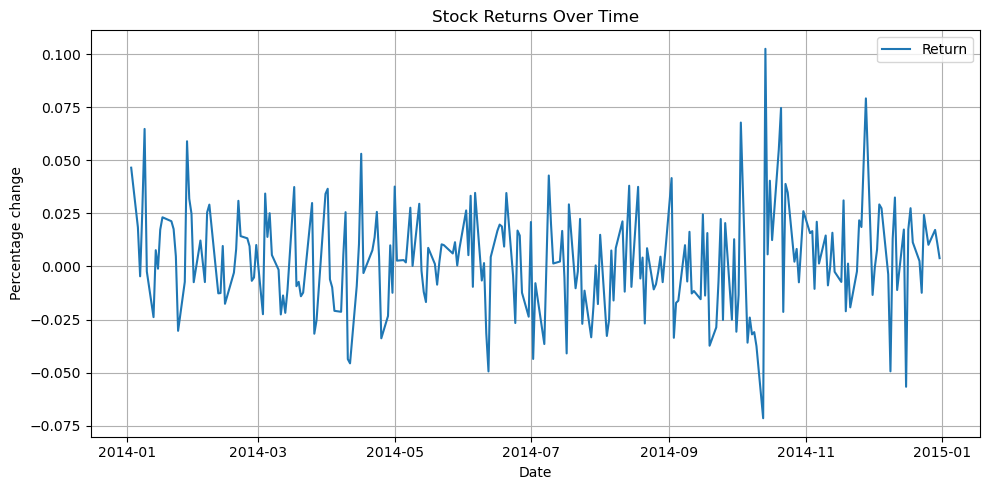

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(df['return'], label='Return')
plt.title('Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage change')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Prices changed roughly +/- 1 point through out the year but we see some deviations in   Q3

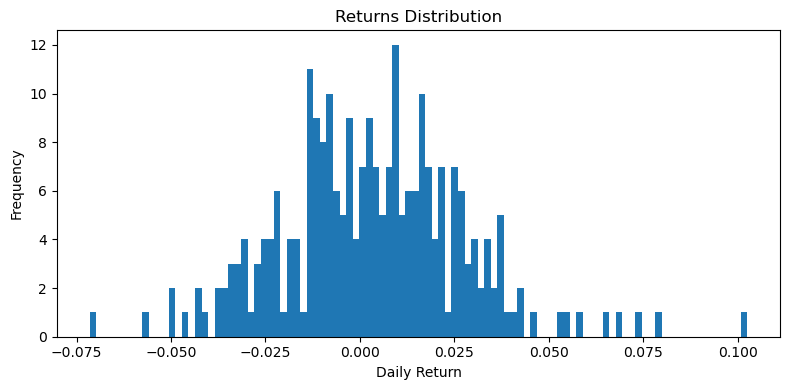

In [25]:
df['return'].plot(kind='hist', bins=100, figsize=(8, 4), title='Returns Distribution')
plt.xlabel('Daily Return')
plt.tight_layout()
plt.show()

## Hypothesis Testing [Optional]

**Question: *Are the returns symmetrical for first and second halves of the year?***

*    $H_{0}$ : The returns are symmetrical for both halves of the year(no significant difference in means)
*    $H_{1}$ : The returns are not symmetric for the two halves

### Split the data

In [26]:
total_rows = len(df)
midpoint = total_rows // 2
returns_first_half = df['return'].iloc[:midpoint]
returns_second_half = df['return'].iloc[midpoint:]

In [27]:
returns_first_half

date
2014-01-03    0.046530
2014-01-06    0.018463
2014-01-07   -0.004624
2014-01-08    0.026947
2014-01-09    0.064785
                ...   
2014-06-26    0.014575
2014-06-27   -0.012346
2014-06-30   -0.023636
2014-07-01    0.020950
2014-07-02   -0.043548
Name: return, Length: 125, dtype: float64

### Perform the T-test

In [28]:
stat, p = stats.ttest_ind(returns_first_half, returns_second_half, equal_var=False)

In [29]:
stat

0.6389707791551223

### Results

In [30]:
print(f"T-test statistic: {stat:.4f}, p-value: {p:.4f}")
if p < 0.05:
    print("Statistically significant difference in returns between halves.")
else:
    print("No statistically significant difference in returns between halves.")


T-test statistic: 0.6390, p-value: 0.5235
No statistically significant difference in returns between halves.


## Conclusion and recommendation

### Conclusion
*    We found that the returns are symetrical for both halves of the year
*    We found that the price almost doubled from January to December
*    
### Recommendations[Optional]
*    